In [13]:
import pandas as pd
import numpy as np
import gc#垃圾回收机制
import time
import pickle#数据保存为一个pkl格式
import seaborn as sns
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn import preprocessing 
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def plot_features(booster,figsize):
    fig ,ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster,ax=ax)

def downcast_dtypes(df): # 数据类型转换
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ['int64','int32']]
    df[float_cols] = df[float_cols].astype(np.float16)
    df[int_cols]=df[int_cols].astype(np.int16)
    return df 
    

In [14]:
train = pd.read_csv("DATA/sales_train_v2.csv")
test = pd.read_csv("DATA/test.csv").set_index("ID")
shops = pd.read_csv("DATA/shops.csv")
cats = pd.read_csv("DATA/item_categories.csv")
items = pd.read_csv("DATA/items.csv")

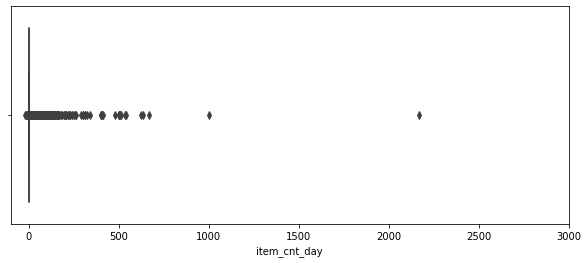

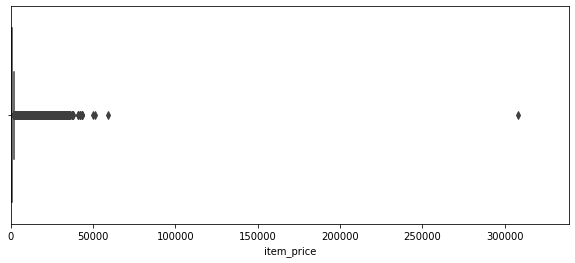

In [5]:
plt.figure(figsize=(10,4))#图的大小
plt.xlim(-100, 3000)#范围
sns.boxplot(x=train.item_cnt_day)#自变量
# plt.show()
plt.figure(figsize=(10,4))#图的大小
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)#最大值乘以1.1
sns.boxplot(x=train.item_price)#自变量
plt.show()

In [6]:
#删除特异值
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1000]

In [7]:
train["item_price"].median()##中值

399.0

In [8]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
median = train[(train.item_price>0)].item_price.median()

In [10]:
#清除重复行--删掉没必要的减少计算量
train.drop_duplicates(subset=["date","date_block_num","shop_id","item_id","item_price","item_cnt_day"],keep='first',inplace=True)

In [11]:
test["shop_id"].unique()

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45])

In [ ]:
# 有几家商店是彼此的复制品，改变训练集和测试集将其更改为同一商店编号
